## Importing Library and Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import warnings
import sys
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Yurohime/DATA-MINING-SEMESTER-5/refs/heads/main/datasets/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning & Preperation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df = df.dropna()
print("The total number of rows after removing missing values:", len(df))

The total number of rows after removing missing values: 2216


## Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [10]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Feature Engineering

In [12]:
df_improved = df

# Age of customer today (2025)
df_improved["Age"] = 2025 - df_improved["Year_Birth"]

# Total spendings on various items
df_improved["Spent"] = (
    df_improved["MntWines"]
    + df_improved["MntFruits"]
    + df_improved["MntMeatProducts"]
    + df_improved["MntFishProducts"]
    + df_improved["MntSweetProducts"]
    + df_improved["MntGoldProds"]
)

# Deriving living situation by marital status
df_improved["Living_With"] = df_improved["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

# Feature indicating total children living in the household
df_improved["Children"] = df_improved["Kidhome"] + df_improved["Teenhome"]

# Feature for total members in the household
df_improved["Family_Size"] = df_improved["Living_With"].replace(
    {"Alone": 1, "Partner": 2}
) + df_improved["Children"]

# Feature pertaining parenthood
df_improved["Is_Parent"] = np.where(df_improved.Children > 0, 1, 0)

# Segmenting education levels in three groups
df_improved["Education_Status"] = df_improved["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

# For clarity
df_improved = df_improved.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)


In [13]:
print("Total categories in the feature Marital_Status:\n", df_improved["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df_improved["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [76]:
df_improved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   Wines                2216 non-null   int64  
 10  Fruits               2216 non-null   int64  
 11  Meat                 2216 non-null   int64  
 12  Fish                 2216 non-null   int64  
 13  Sweets               2216 non-null   int64  
 14  Gold                 2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

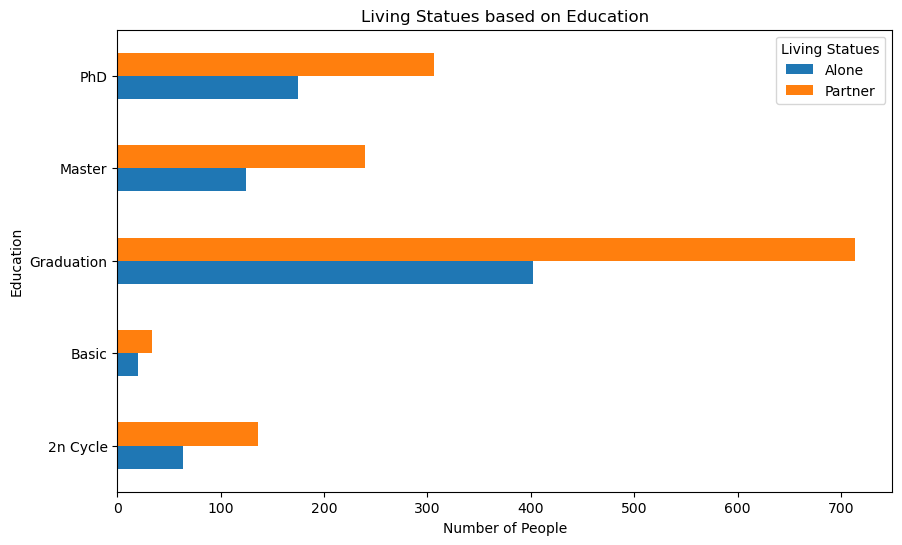

In [14]:
count_type_by_quality = df_improved.groupby(['Education','Living_With'])['Living_With'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Living Statues based on Education')
plt.ylabel('Education')
plt.xlabel('Number of People')
plt.legend(title='Living Statues')
plt.show()

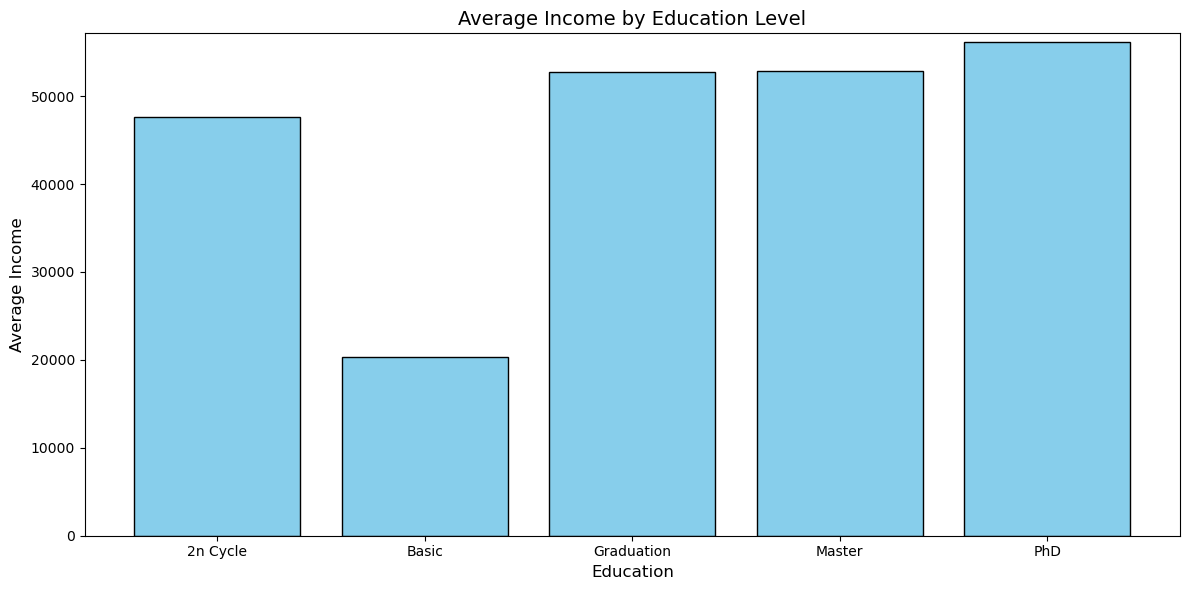

In [15]:
# Calculate average income per education category
avg_income = df_improved.groupby('Education')['Income'].mean()

# Create the bar chart using the aggregated data
plt.figure(figsize=(12, 6))
plt.bar(avg_income.index, avg_income, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Education", fontsize=12)
plt.ylabel("Average Income", fontsize=12)
plt.title("Average Income by Education Level", fontsize=14)
plt.ylim(0, avg_income.max() + 1000)  # Add space above the highest bar for clarity

# Show the chart
plt.tight_layout()
plt.show()


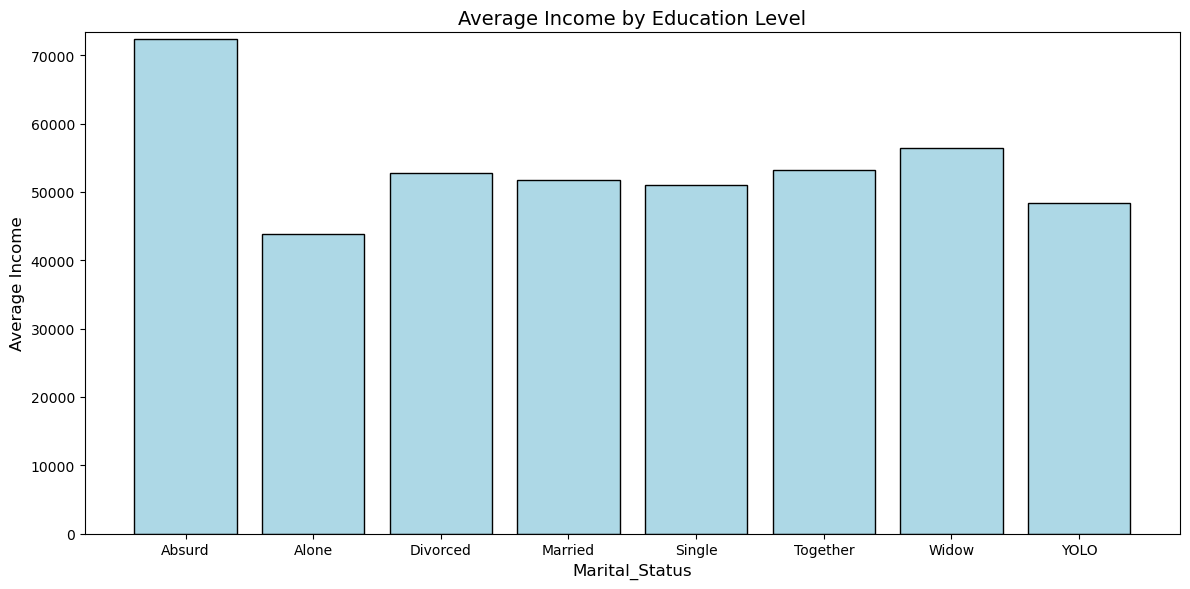

In [16]:
# Calculate average income per education category
avg_income = df_improved.groupby('Marital_Status')['Income'].mean()

# Create the bar chart using the aggregated data
plt.figure(figsize=(12, 6))
plt.bar(avg_income.index, avg_income, color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel("Marital_Status", fontsize=12)
plt.ylabel("Average Income", fontsize=12)
plt.title("Average Income by Education Level", fontsize=14)
plt.ylim(0, avg_income.max() + 1000)  # Add space above the highest bar for clarity

# Show the chart
plt.tight_layout()
plt.show()

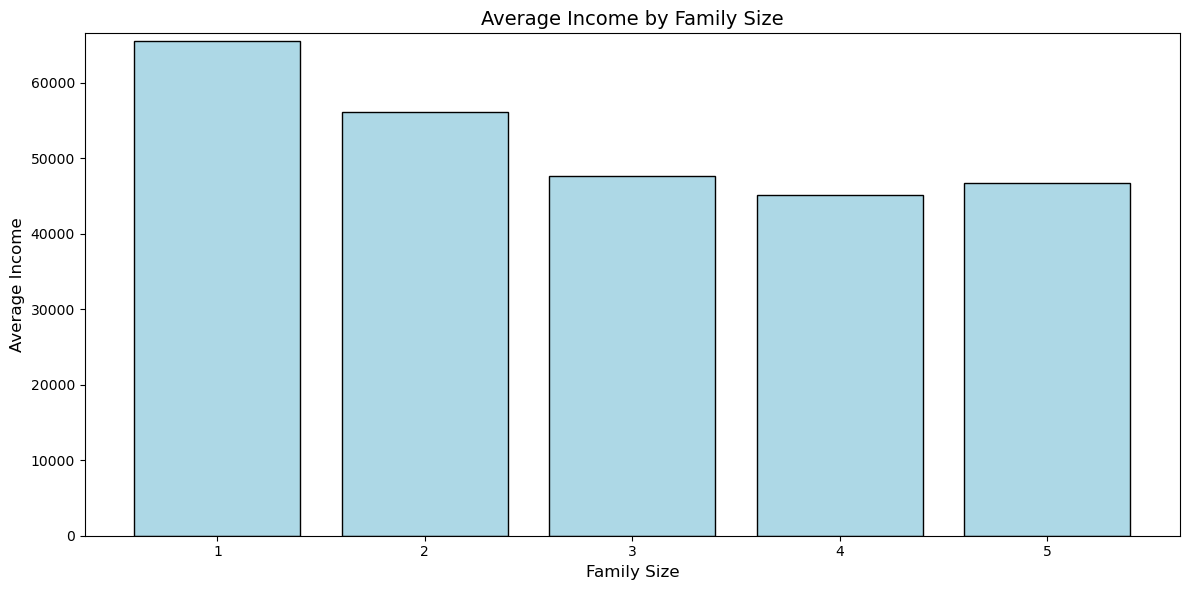

In [89]:
# Calculate average income per education category
avg_income = df_improved.groupby('Family_Size')['Income'].mean()

# Create the bar chart using the aggregated data
plt.figure(figsize=(12, 6))
plt.bar(avg_income.index, avg_income, color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Average Income", fontsize=12)
plt.title("Average Income by Family Size", fontsize=14)
plt.ylim(0, avg_income.max() + 1000)  # Add space above the highest bar for clarity

# Show the chart
plt.tight_layout()
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

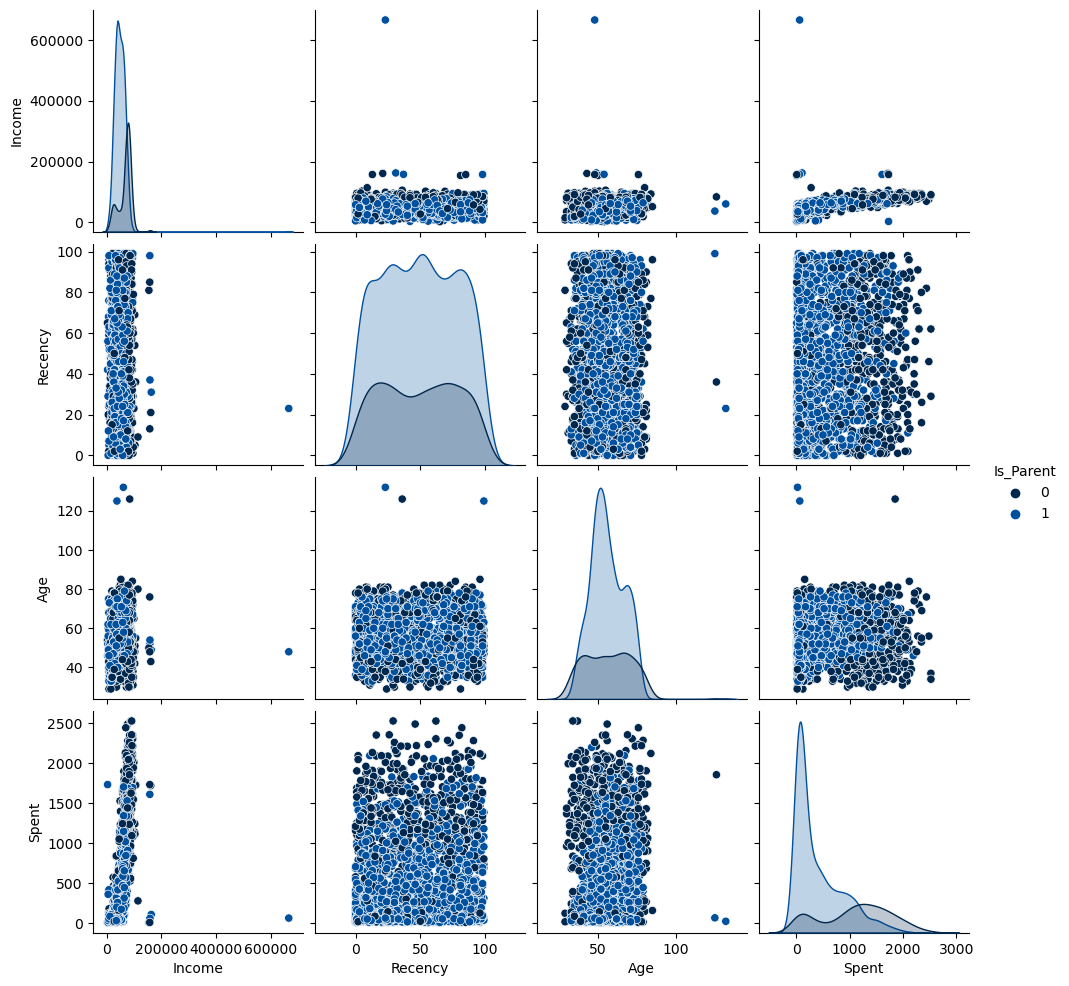

In [18]:
#Plotting following features
pallet = ["#00274D", "#00509E", "#0074D9", "#4198E1", "#7FC3F2", "#CFE8FC"]

# Create a ListedColormap with the new palette
cmap = colors.ListedColormap(pallet)

# Create the Plot
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_improved[To_Plot], hue= "Is_Parent",palette= (["#00274D", "#00509E"]))

#Taking hue 
plt.show()

<Axes: >

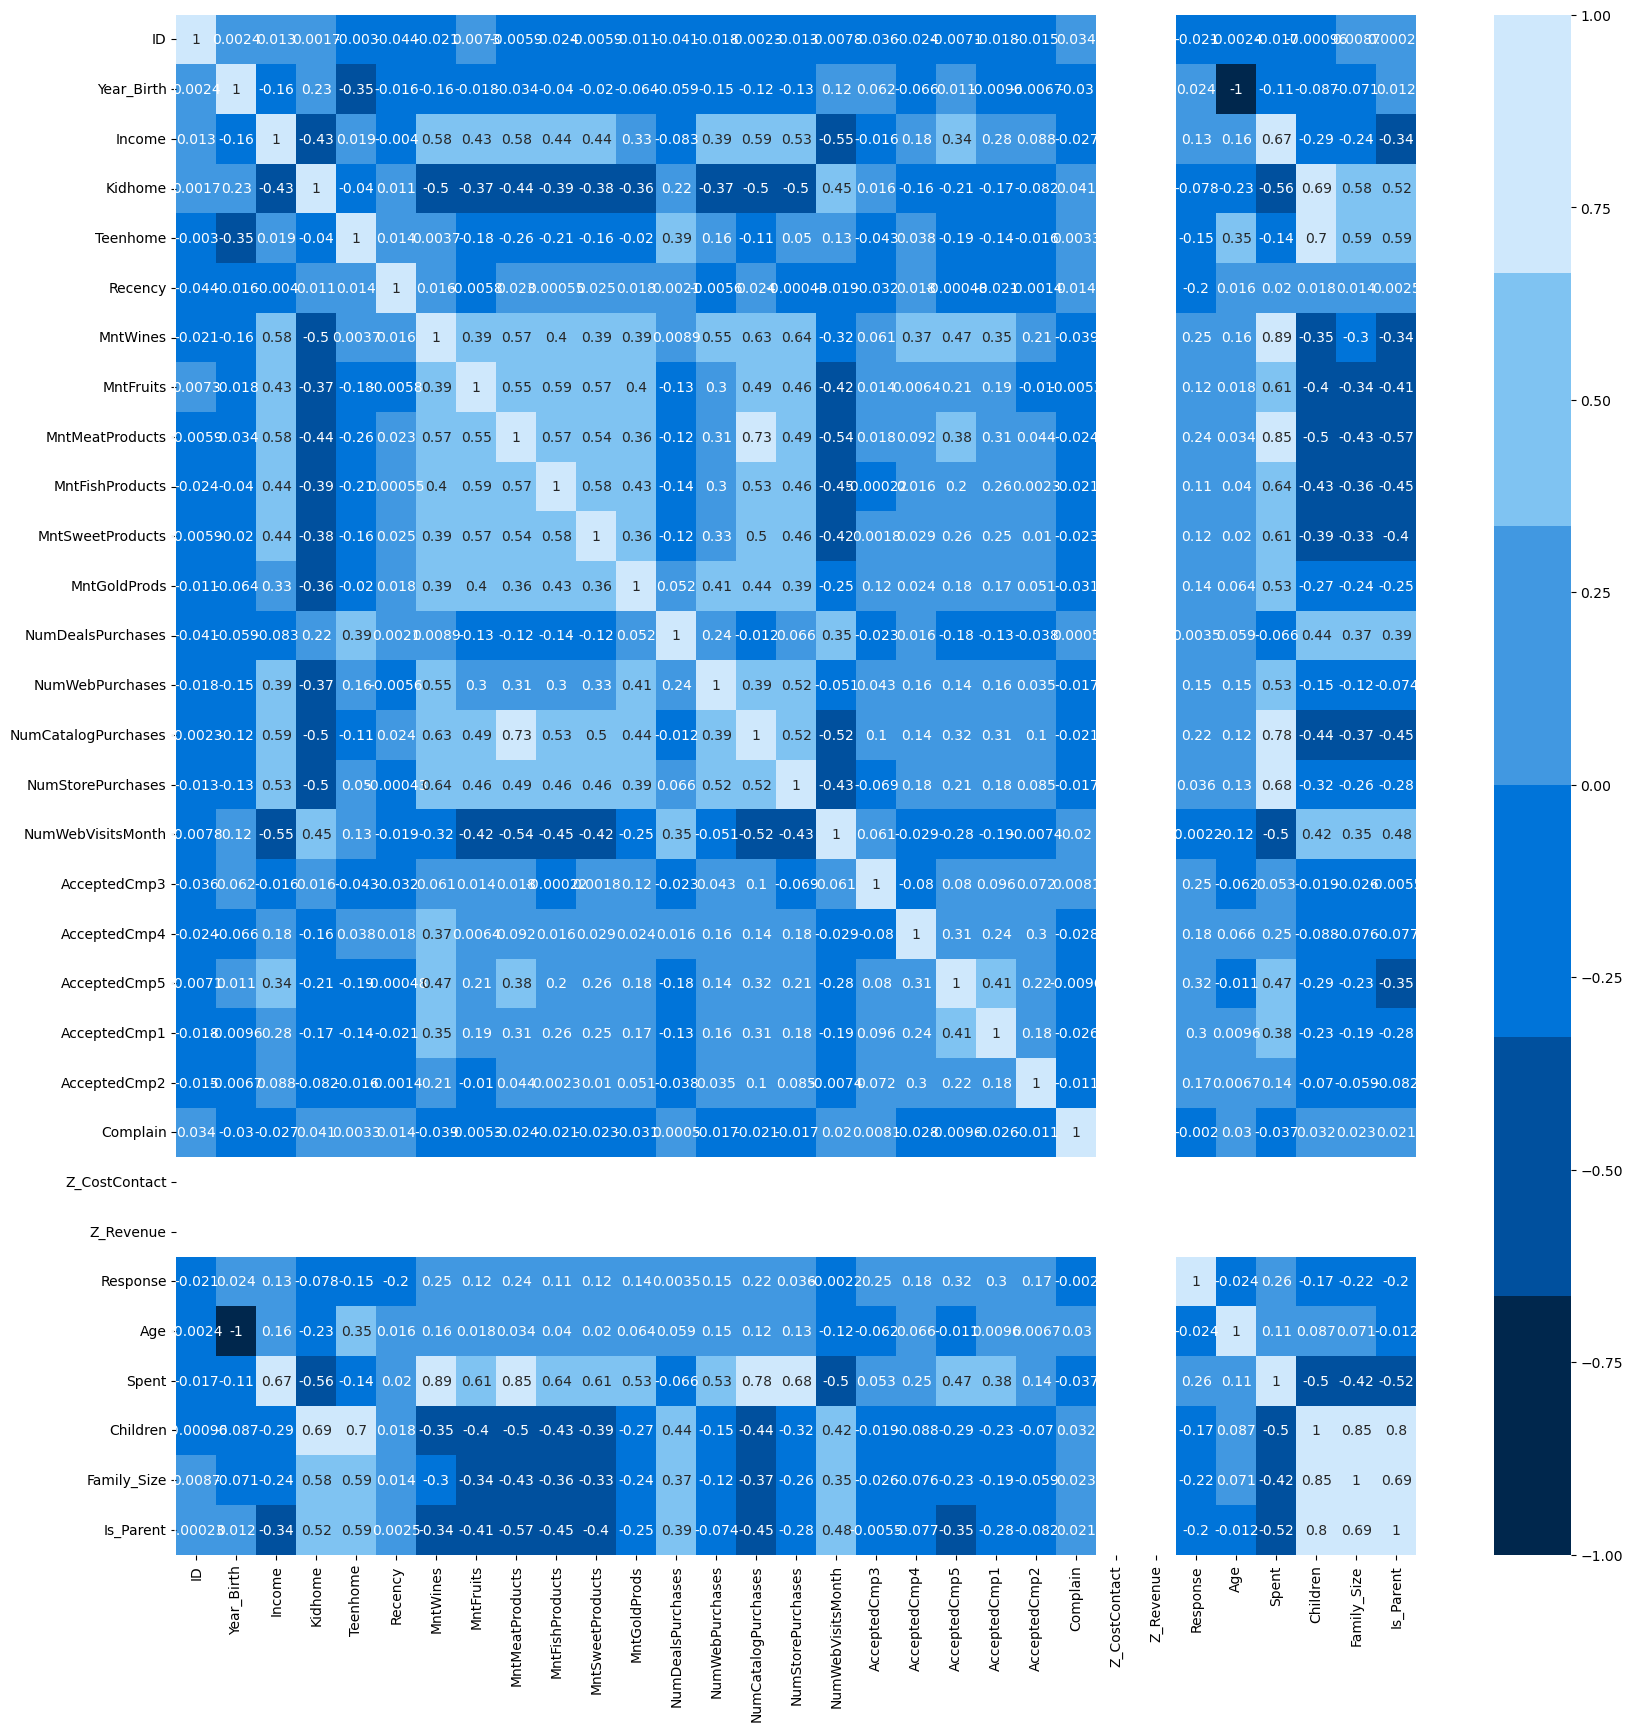

In [20]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

## Data Encoding

In [21]:
# Rename df_improved to df_encoded
df_encoded = df_improved

# Replaced with Age
df_encoded = df_encoded.drop(columns=['Dt_Customer'])


# Identify columns to encode
categorical_columns = ['Education', 'Marital_Status', 'Living_With', 'Education_Status']

# Apply label encoding for simplicity
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Show the first few rows of the encoded dataframe
df_encoded.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Education_Status
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,3,11,1,68,1617,0,0,1,0,0
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,3,11,0,71,27,0,2,3,1,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,3,11,0,60,776,1,0,2,0,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,3,11,0,41,53,1,1,3,1,0
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,3,11,0,44,422,1,1,3,1,1


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int32  
 3   Marital_Status       2216 non-null   int32  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   Wines                2216 non-null   int64  
 9   Fruits               2216 non-null   int64  
 10  Meat                 2216 non-null   int64  
 11  Fish                 2216 non-null   int64  
 12  Sweets               2216 non-null   int64  
 13  Gold                 2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(sc.fit_transform(df_encoded), columns=df_encoded.columns)

# Display the first few rows of the inverse-transformed dataframe
df_scaled.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Education_Status
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,...,0.0,0.0,2.377952,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389,-0.894187
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,...,0.0,0.0,-0.420530,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356,-0.894187
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,...,0.0,0.0,-0.420530,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389,-0.894187
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,...,0.0,0.0,-0.420530,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356,-0.894187
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,...,0.0,0.0,-0.420530,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356,0.569268


## Creating Model (K-Means Clustering)

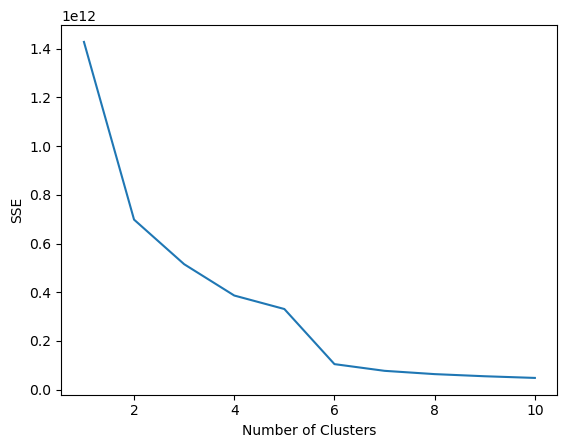

In [24]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [25]:
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 6


In [26]:

kmeans = KMeans(n_clusters=6, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_encoded)

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the entire df_encoded DataFrame (assuming all columns were scaled)
sc.fit(df_encoded)

# Create a copy of df_encoded for inverse transformation
df_inverse = df_encoded

# Apply inverse transformation to all columns using sc.inverse_transform
df_inverse[:] = sc.inverse_transform(df_encoded)  # Applying to all columns

# Add Clustering
df_inverse['Cluster'] = y_pred

# Display the first few rows of the inverse-transformed dataframe
df_inverse.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Education_Status,Cluster
0,1.795109e+07,25419.256811,4.641727,8.036035,1.463234e+09,0.441787,0.505415,1727.638152,214459.984373,3527.430479,...,22.0,0.507607,871.013367,975277.154630,0.645307,0.947202,3.498027,0.714350,0.611011,5
1,7.068138e+06,25383.308262,4.641727,8.036035,1.166410e+09,0.978562,1.049474,1148.801767,4014.861402,66.140984,...,22.0,0.150271,906.961915,16881.714904,0.645307,2.444988,5.309062,1.166074,0.611011,1
2,1.345822e+07,25515.119606,4.641727,9.113523,1.802365e+09,0.441787,0.505415,801.499936,143974.358250,1975.817947,...,22.0,0.150271,775.150571,468352.271102,1.123727,0.947202,4.403544,0.714350,0.611011,2
3,2.008870e+07,25742.793746,4.641727,9.113523,6.706627e+08,0.978562,0.505415,801.499936,4014.861402,185.495794,...,22.0,0.150271,547.476431,32553.590019,1.123727,1.696095,5.309062,1.166074,0.611011,3
4,1.730136e+07,25706.845198,6.889502,6.958547,1.467135e+09,0.978562,0.505415,2769.543645,58649.652943,1737.108326,...,22.0,0.150271,583.424980,254973.663766,1.123727,1.696095,5.309062,1.166074,1.294325,5


In [28]:
# Assuming 'Cluster' is the column indicating cluster assignments

# Select relevant columns for summarization
relevant_columns = ['Age', 'Income', 'Spent', 'Children', 'Family_Size']  # Add other numeric columns if needed
    
# Group by 'Cluster' and calculate mean for each group
cluster_summary = df_inverse.groupby('Cluster')[relevant_columns].mean().reset_index()
    
# Add additional metrics if needed, e.g., size of each cluster
cluster_summary['Cluster_Size'] = df_inverse.groupby('Cluster').size().values
    
# Display the cluster summary
cluster_summary = cluster_summary.transpose()
cluster_summary



,0,1,2,3,4,5
Cluster,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Age,6.929825e+02,7.327497e+02,7.439850e+02,6.613135e+02,6.313564e+02,7.653975e+02
Income,3.977112e+09,1.053467e+09,2.011386e+09,5.864598e+08,1.677830e+10,1.547151e+09
Spent,4.513888e+05,1.327379e+05,8.446065e+05,4.480451e+04,3.797847e+04,4.899484e+05
Children,1.375141e+00,1.941208e+00,1.201603e+00,1.689526e+00,1.696095e+00,1.676706e+00
Family_Size,4.791623e+00,5.274917e+00,4.384319e+00,4.981407e+00,5.309062e+00,4.974987e+00
Cluster_Size,7.000000e+00,6.630000e+02,4.710000e+02,4.560000e+02,1.000000e+00,6.180000e+02


In [29]:
df_inverse.Cluster.value_counts()

1    663
5    618
2    471
3    456
0      7
4      1
Name: Cluster, dtype: int64

In [61]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-1.923852e-17,2.933446,-5.750067,-2.523894,-0.831037,2.229961,8.430756
col2,2216.0,8.977977e-17,1.779644,-4.547755,-1.470123,0.019320,1.365931,6.063594
col3,2216.0,1.603210e-17,1.410980,-5.737583,-0.871353,-0.050184,0.682899,7.164254


In [68]:
# visualize the result using scater chart
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
df_inverse["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_inverse["Clusters"]= yhat_AC

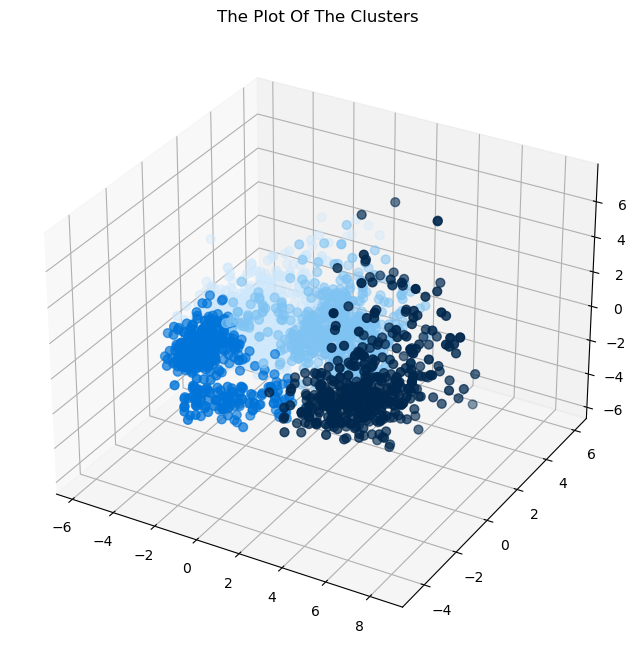

In [69]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Creating Model (Hierarchical Clustering) 

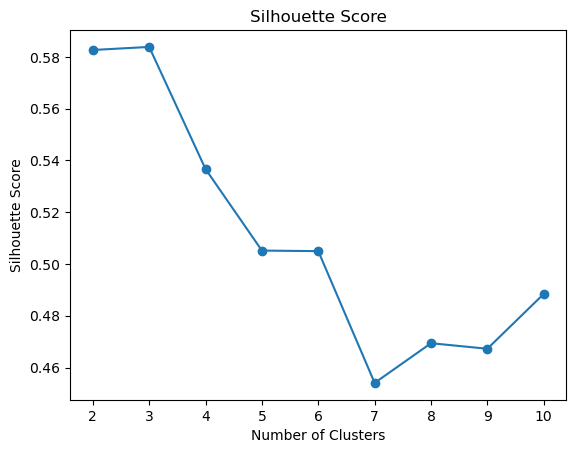

In [30]:
silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_inverse, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_inverse, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [35]:
hc = AgglomerativeClustering(n_clusters = 6, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_encoded)

In [42]:
# Rename the columns to new descriptive names

# Create a copy of df_encoded for inverse transformation
df_imputed_inversed = df_inverse

# Apply inverse transformation to all columns using sc.inverse_transform  # Applying to all columns

df_imputed_inversed['KMeans'] = y_pred
df_imputed_inversed['Agglo'] = y_hc

# show the df
df_imputed_inversed.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Education_Status,Cluster,KMeans,Agglo
0,1.795109e+07,25419.256811,4.641727,8.036035,1.463234e+09,0.441787,0.505415,1727.638152,214459.984373,3527.430479,...,871.013367,975277.154630,0.645307,0.947202,3.498027,0.714350,0.611011,5,5,0
1,7.068138e+06,25383.308262,4.641727,8.036035,1.166410e+09,0.978562,1.049474,1148.801767,4014.861402,66.140984,...,906.961915,16881.714904,0.645307,2.444988,5.309062,1.166074,0.611011,1,1,0
2,1.345822e+07,25515.119606,4.641727,9.113523,1.802365e+09,0.441787,0.505415,801.499936,143974.358250,1975.817947,...,775.150571,468352.271102,1.123727,0.947202,4.403544,0.714350,0.611011,2,2,4
3,2.008870e+07,25742.793746,4.641727,9.113523,6.706627e+08,0.978562,0.505415,801.499936,4014.861402,185.495794,...,547.476431,32553.590019,1.123727,1.696095,5.309062,1.166074,0.611011,3,3,1
4,1.730136e+07,25706.845198,6.889502,6.958547,1.467135e+09,0.978562,0.505415,2769.543645,58649.652943,1737.108326,...,583.424980,254973.663766,1.123727,1.696095,5.309062,1.166074,1.294325,5,5,0


In [43]:
df_imputed_inversed.Agglo.value_counts()

0    801
4    633
1    546
3    228
2      7
5      1
Name: Agglo, dtype: int64

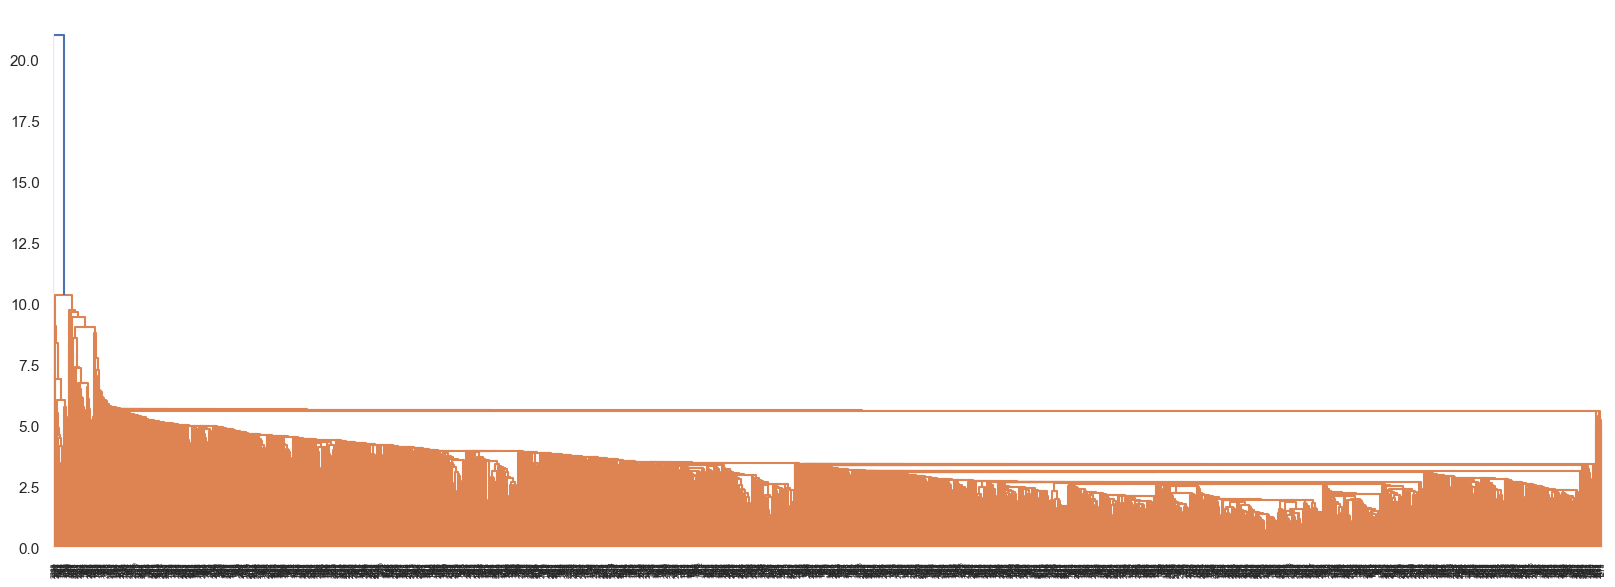

In [170]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='single')
dendrogram(linkage_data)
plt.show()

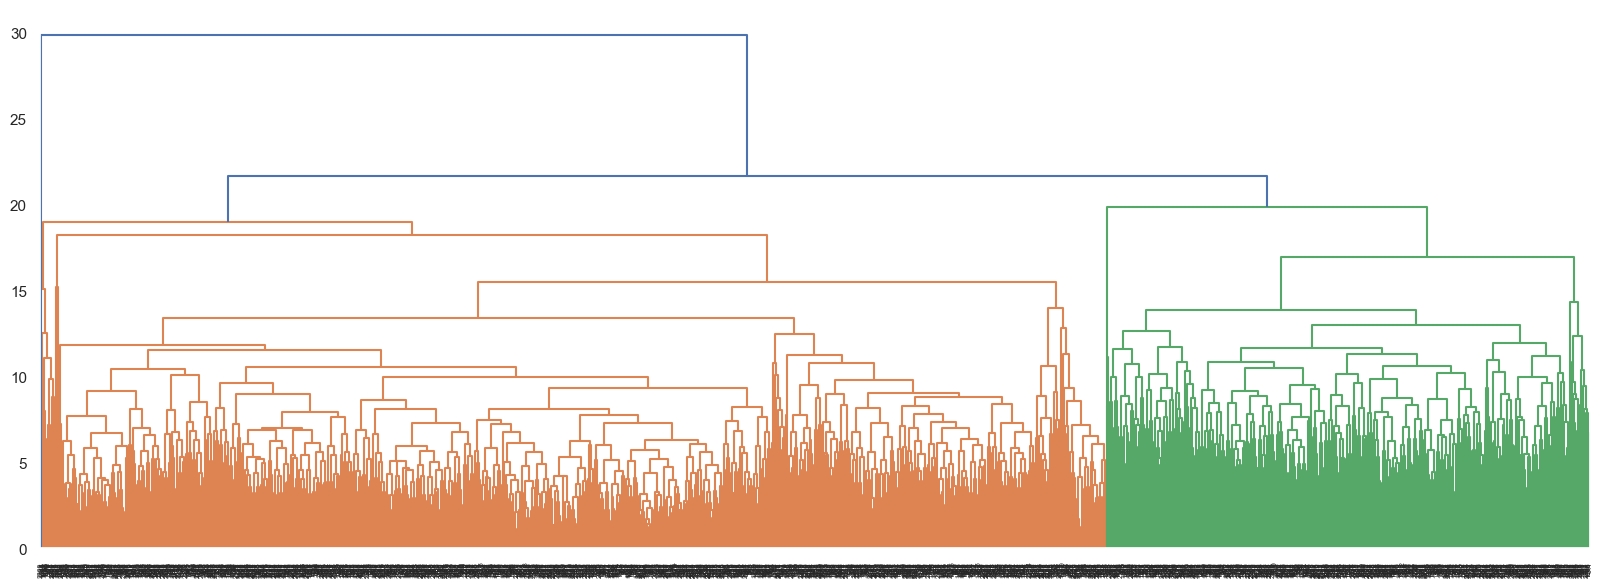

In [171]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='complete')
dendrogram(linkage_data)
plt.show()

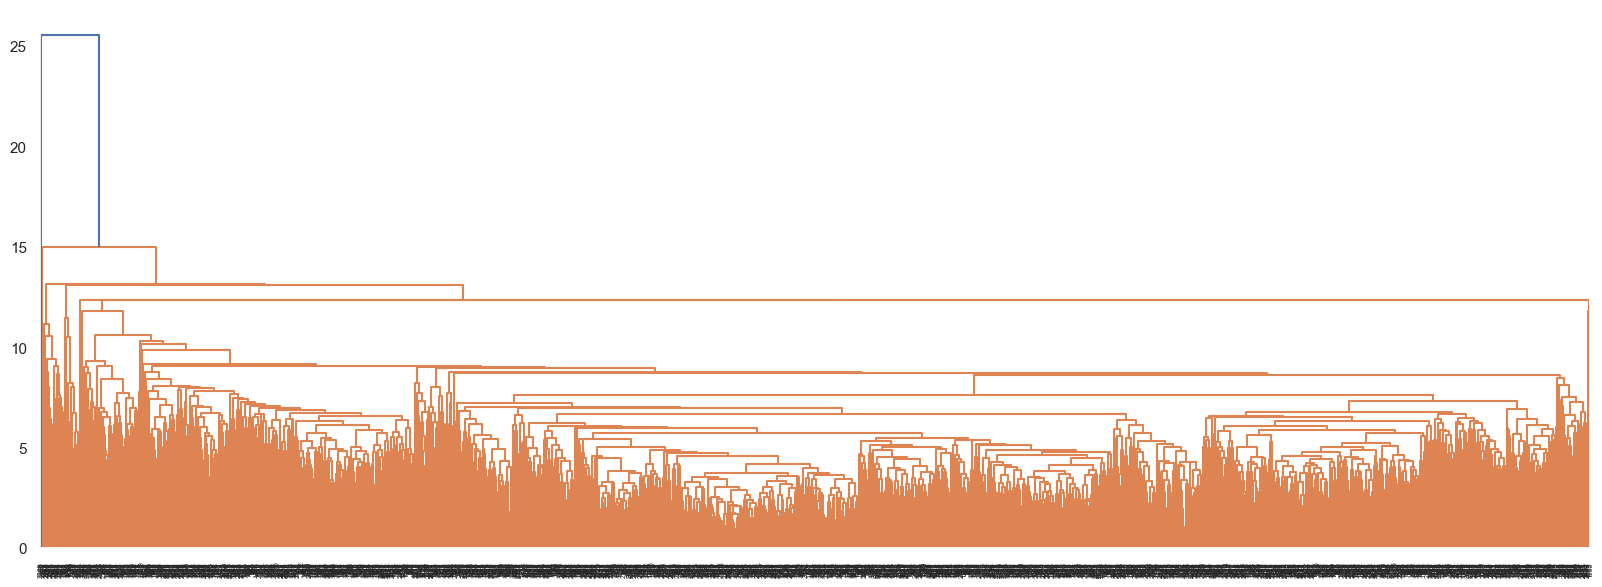

In [172]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='average')
dendrogram(linkage_data)
plt.show()

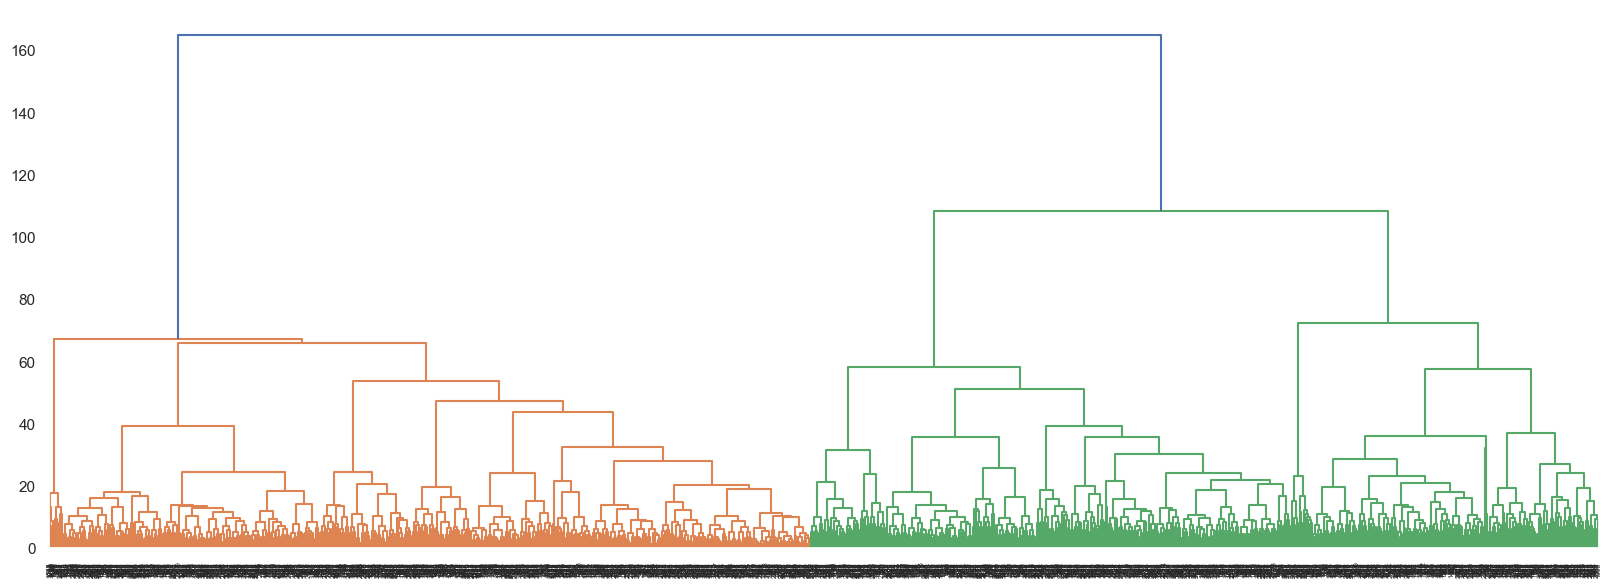

In [173]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scaled, method='ward')
dendrogram(linkage_data)
plt.show()

## Creating Model (Apriori Algorithm)

In [75]:
# Keep only columns 9 to 14 (Python index-based, so adjust if column names are needed)
columns_to_keep = df_improved.columns[9:15]  # Index 15 is exclusive
df_imputed = df_improved[columns_to_keep]

# Display the resulting DataFrame
df_imputed.sample(10)

,Wines,Fruits,Meat,Fish,Sweets,Gold
1072,473,21,176,19,21,56
1639,9,1,5,4,5,7
371,159,4,45,6,2,38
1915,159,0,120,0,0,137
2110,189,10,253,56,43,64
545,8,4,10,6,7,6
1293,4,0,5,0,1,5
1269,630,26,611,44,18,54
468,335,42,127,28,5,5
2150,35,1,16,0,1,1


we're assuming that this is the price of each item, 
so we'll be converting the data from the cost value 
into a yes or no value. (ex. 238 = 1; 1 = 1; 0 = 0)

In [80]:
# Transform the DataFrame
df_imputed = df_filtered.applymap(lambda x: 1 if x != 0 else 0)

# Display the transformed DataFrame
df_imputed.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)
df_imputed.head(10)

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,0,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,0,1,1,1,1
9,1,0,1,1,1,1


In [84]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_imputed, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# printing the frequent itemset
frequent_itemsets.head(33)

C:\Users\Lolz\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.994134,(Wines),1
1,0.821751,(Fruits),1
2,0.999549,(Meat),1
3,0.828971,(Fish),1
4,0.813628,(Sweets),1
5,0.972473,(Gold),1
6,0.818141,"(Fruits, Wines)",2
7,0.994134,"(Wines, Meat)",2
8,0.823105,"(Wines, Fish)",2
9,0.808213,"(Wines, Sweets)",2


In [85]:
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 0.6) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Wines),(Meat),0.994134,0.999549,0.994134,1.0,1.000451,0.000449,inf,0.076923
10,(Fruits),(Meat),0.821751,0.999549,0.821751,1.0,1.000451,0.000371,inf,0.002532
30,"(Fruits, Wines)",(Meat),0.818141,0.999549,0.818141,1.0,1.000451,0.000369,inf,0.002481
54,"(Wines, Fish)",(Meat),0.823105,0.999549,0.823105,1.0,1.000451,0.000371,inf,0.002551
61,"(Wines, Sweets)",(Meat),0.808213,0.999549,0.808213,1.0,1.000451,0.000365,inf,0.002353


## Interpretation

The clustering results revealed distinct customer segments based on demographics and spending behavior. These segments can be targeted with personalized marketing strategies.

The Apriori algorithm identified common purchasing patterns, providing insights into which products are frequently bought together. This can inform strategies for product recommendations and promotions.

The cluster summaries help in understanding which customer segments are the most valuable in terms of income, spending, and family size. This information can guide resource allocation for marketing campaigns and other business strategies.
Applications

The customer segments identified through clustering can be used to create targeted marketing campaigns, ensuring that the right message is delivered to the right audience.

The frequent itemsets and association rules can be leveraged to recommend products to customers based on their purchasing history and the behavior of similar customers.

Insights from clustering can optimize the allocation of resources, such as targeted discounts, advertising budgets, and customer service efforts, by focusing on the most profitable customer segments.